# Drawing Charts

This notebook presents various options for drawing charts of data, to complement the Week 3 chart types video.

This tutorial uses concepts from both the [Selection](Selection.ipynb) and [Reshaping](Reshaping.ipynb) notebooks.

This notebook uses the “MovieLens + IMDB/RottenTomatoes” data from the [HETREC data](https://grouplens.org/datasets/hetrec-2011/).  It also uses data sets built in to Seaborn.

## Setup

First we will import our modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then import the HETREC MovieLens data.  A few notes:

- Tab-separated data
- Not UTF-8 - latin-1 encoding seems to work
- Missing data encoded as `\N` (there's a good chance that what we have is a PostgreSQL data dump!)

### Movies

In [2]:
movies = pd.read_csv('hetrec2011-ml/movies.dat', delimiter='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10197 non-null  int64  
 1   title                   10197 non-null  object 
 2   imdbID                  10197 non-null  int64  
 3   spanishTitle            10197 non-null  object 
 4   imdbPictureURL          10016 non-null  object 
 5   year                    10197 non-null  int64  
 6   rtID                    9886 non-null   object 
 7   rtAllCriticsRating      9967 non-null   float64
 8   rtAllCriticsNumReviews  9967 non-null   float64
 9   rtAllCriticsNumFresh    9967 non-null   float64
 10  rtAllCriticsNumRotten   9967 non-null   float64
 11  rtAllCriticsScore       9967 non-null   float64
 12  rtTopCriticsRating      9967 non-null   float64
 13  rtTopCriticsNumReviews  9967 non-null   float64
 14  rtTopCriticsNumFresh    9967 non-null 

It's useful to index movies by ID, so let's just do that now.

In [4]:
movies = movies.set_index('id')

And extract scores:

In [5]:
movie_scores = movies[['rtAllCriticsRating', 'rtTopCriticsRating', 'rtAudienceRating']].rename(columns={
    'rtAllCriticsRating': 'All Critics',
    'rtTopCriticsRating': 'Top Critics',
    'rtAudienceRating': 'Audience'
})
movie_scores

,All Critics,Top Critics,Audience
id,,,
1,9.0,8.5,3.7
2,5.6,5.8,3.2
3,5.9,7.0,3.2
4,5.6,5.5,3.3
5,5.3,5.4,3.0
...,...,...,...
65088,4.4,4.7,3.5
65091,7.0,0.0,3.7
65126,5.6,4.9,3.3


### Movie Info

In [6]:
movie_genres = pd.read_csv('hetrec2011-ml/movie_genres.dat', delimiter='\t', encoding='latin1')
movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [7]:
movie_tags = pd.read_csv('hetrec2011-ml/movie_tags.dat', delimiter='\t', encoding='latin1')
movie_tags.head()

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1


In [8]:
tags = pd.read_csv('hetrec2011-ml/tags.dat', delimiter='\t', encoding='latin1')
tags.head()

,id,value
0,1,earth
1,2,police
2,3,boxing
3,4,painter
4,5,whale


### Ratings

In [9]:
ratings = pd.read_csv('hetrec2011-ml/user_ratedmovies-timestamps.dat', delimiter='\t', encoding='latin1')
ratings.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


We're going to compute movie statistics too:

In [10]:
movie_stats = ratings.groupby('movieID')['rating'].agg(['count', 'mean']).rename(columns={
    'mean': 'MeanRating',
    'count': 'RatingCount'
})
movie_stats.head()

,RatingCount,MeanRating
movieID,,
1,1263,3.735154
2,765,2.976471
3,252,2.873016
4,45,2.577778
5,225,2.753333


### Titanic data

We'll also use the Titanic data set from Seaborn:

In [11]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Initial Example

This is the chart for the initial example - same as from the Charting notebook:

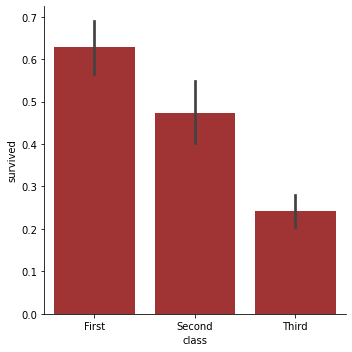

In [12]:
sns.catplot('class', 'survived', data=titanic, kind='bar', color='firebrick', height=5, aspect=1)

## Pseudo-3D

Psuedo-3D charts plot two explanatory variables on the *x* and *y* axes, use another means to indicate the response variable.

For this, we are going to use the RottenTomatoes all-critics and audience scores, and we want to see the *joint distribution*: how frequently do different combinations of critic and audience scores appear?

We'll start with the scatter plot, just to show its clutter:

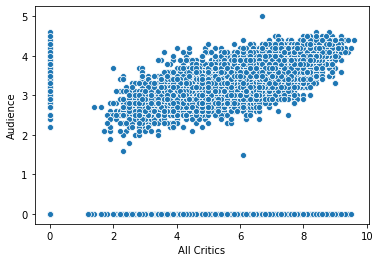

In [13]:
sns.scatterplot('All Critics', 'Audience', data=movie_scores)

Zeros look odd here - since there are no missing values, and there's a huge gap between zero and the first actual score, it looks more likely that zeros are missing data.  Let's treat them as such:

In [14]:
movie_scores[movie_scores == 0] = np.nan
movie_scores.describe()

,All Critics,Top Critics,Audience
count,8441.000000,4662.000000,7345.000000
mean,6.068404,5.930330,3.389258
std,1.526898,1.534093,0.454034
min,1.200000,1.600000,1.500000
25%,5.000000,4.800000,3.100000
50%,6.200000,6.100000,3.400000
75%,7.200000,7.100000,3.700000
max,9.600000,10.000000,5.000000


Now we have missing values!  The assignment did a couple of things:

1. Create a data frame with all logical columns, that is `True` everywhere a score is 0 (vectorization works in more than one dimension!)
2. Use it as a mask, to set all values where it's `True` to Not a Number (Pandas' missing-data signal)

Then we look at the description, and we see counts that indicate a lot of missing data.

We're going to focus on all critics and audience, so let's drop top critics, and drop all rows without values for both all critics and audience, since they will be unplottable:

In [15]:
ms_trimmed = movie_scores[['All Critics', 'Audience']].rename(columns={
    'All Critics': 'Critics'
}).dropna()

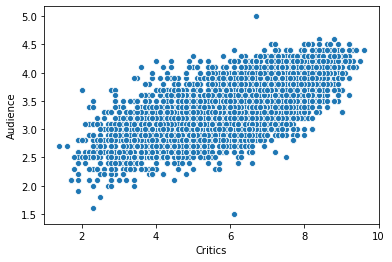

In [16]:
sns.scatterplot('Critics', 'Audience', data=ms_trimmed)

This has less funny business going on, but also is super cluttered - we see a mass, but how does the relative distribution of dots in different parts of the mass *actually* differ? It's just a blob.

### Contour Plot

A contour plot shows how frequent different points in a 2D space are, using contour lines (like topographic maps).

Seaborn does this with the two-parameter `kdeplot`.  Unlike many other methods, `kdeplot` doesn't know how to extract columns from data frames.

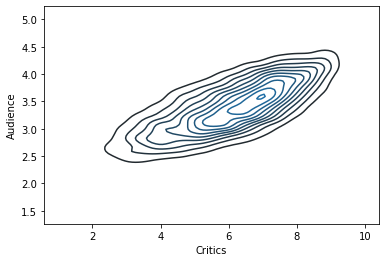

In [17]:
sns.kdeplot(ms_trimmed['Critics'], ms_trimmed['Audience'])

The peak is at about $(7,3.5)$.

### Heat Map

Now let's do a heat map.  Seaborn heat maps require us to pre-compute the different values, and can display arbitrary statistics.  The heat map actually wants a 2D data structure. So we're going to:

* Bin values - critics to whole stars, audience to half.
    * Critics: round
    * Audience: multiply by 2, round, divide by 2
* Use `pivot_table` to count values in each combination of rounded audience ratings.  The `pivot_table` method requires a value column to aggregate, so we'll make a column filled with 1s.

In [18]:
ms_bins = pd.DataFrame({
    'Critics': ms_trimmed['Critics'].round(),
    'Audience': (ms_trimmed['Audience'] * 2).round() / 2
})
ms_bins

,Critics,Audience
id,,
1,9.0,3.5
2,6.0,3.0
3,6.0,3.0
4,6.0,3.5
5,5.0,3.0
...,...,...
65037,6.0,4.0
65088,4.0,3.5
65091,7.0,3.5


Now we pivot, and the `droplevel` method gets rid of the extra level of the column index (try without it and see what happens!)

In [19]:
msb_counts = ms_bins.assign(v=1).pivot_table(index='Audience', columns='Critics', aggfunc='count', fill_value=0)
msb_counts = msb_counts.droplevel(0, axis=1)
msb_counts

Critics,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Audience,,,,,,,,,,
1.5,0,1,0,0,0,1,0,0,0,0
2.0,0,12,17,6,1,0,0,0,0,0
2.5,1,50,118,205,110,39,7,1,0,0
3.0,0,21,157,477,616,672,257,41,0,0
3.5,0,4,29,135,361,882,883,400,26,0
4.0,0,0,1,18,50,215,472,625,156,1
4.5,0,0,0,0,1,4,20,58,59,1
5.0,0,0,0,0,0,0,1,0,0,0


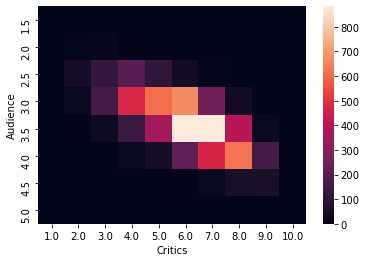

In [20]:
sns.heatmap(msb_counts)

That audience axis is upside down. Let's reverse it:

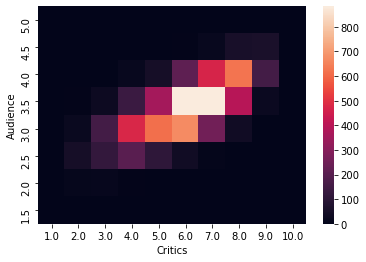

In [21]:
sns.heatmap(msb_counts.iloc[::-1, :])

The `::-1` slice means 'all elements in reverse order'.

## Secondary Aesthetics

We're going to use the Titanic data again to show the survival rate by both class and sex:

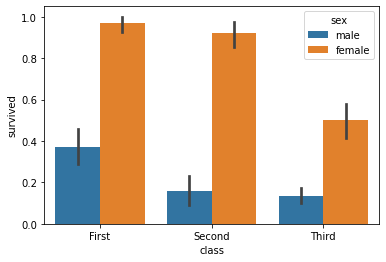

In [22]:
sns.barplot('class', 'survived', data=titanic, hue='sex')

Now let's do the same thing with a point plot:

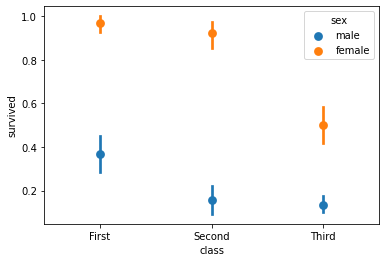

In [23]:
sns.pointplot('class', 'survived', data=titanic, hue='sex', join=False)

### Breaking Down by More Things

We're going to show survival rate by:

- age
- sex
- class

The chart look really noisy with raw age, so we're going to bin into 10-year bands:

In [24]:
titanic['agebin'] = titanic['age'].round(-1)

Then we compute the rate for each point:

In [25]:
rate = titanic.groupby(['class', 'sex', 'agebin'], observed=True)['survived'].mean().reset_index(name='Survival')
rate

,class,sex,agebin,Survival
0,Third,female,0.0,0.733333
1,Third,female,10.0,0.166667
2,Third,female,20.0,0.526316
3,Third,female,30.0,0.476190
4,Third,female,40.0,0.230769
5,Third,female,50.0,0.000000
6,Third,female,60.0,1.000000
7,Third,male,0.0,0.384615
8,Third,male,10.0,0.285714
9,Third,male,20.0,0.107843


And plot:

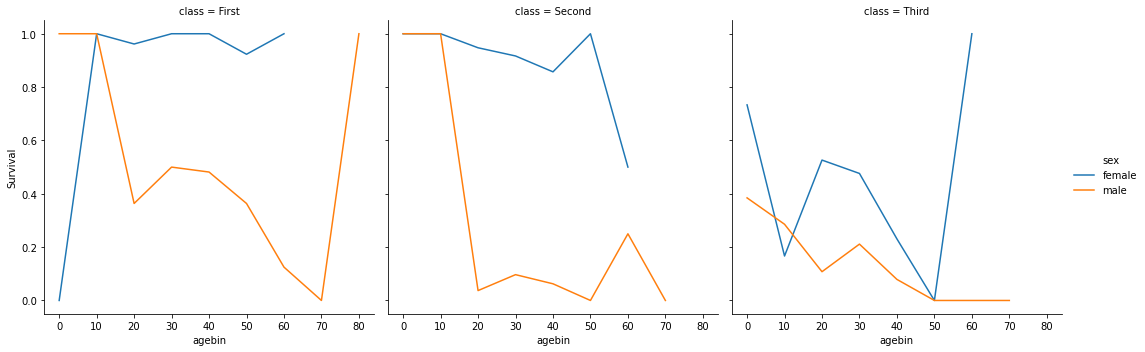

In [26]:
sns.relplot('agebin', 'Survival', hue='sex', col='class', data=rate, kind='line')